# Logistic Regression

<div style="float:right; font-style:italic;color:#AAAAAA">Author:Winglok</div><br>
<div style="float:right; font-style:italic;color:#AAAAAA">From:SCUT</div>

**Download the dataset "a9a&a9a.t":**

In [1]:
import requests
r1 = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a")
r2 = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t")

**Load the dataset to X_train&y_train,X_val&y_val:**

In [2]:
from sklearn.datasets import load_svmlight_file
from io import BytesIO
X_train, y_train = load_svmlight_file(BytesIO(r1.content), n_features=123)
X_train = X_train.toarray()

X_val, y_val = load_svmlight_file(BytesIO(r2.content), n_features=123)
X_val = X_val.toarray()

**Preprocess, change the shape of X_train&y_train,X_val&y_val:**

In [3]:
import numpy
n_samples, n_features = X_train.shape
X_train = numpy.column_stack((X_train, numpy.ones((n_samples, 1))))
y_train = y_train.reshape((-1, 1))

n_samples, n_features = X_val.shape
X_val = numpy.column_stack((X_val, numpy.ones((n_samples, 1))))
y_val = y_val.reshape((-1, 1))

**Define max iterations, learning rate and batch size:**

In [4]:
max_epoch = 1500
learning_rate = 0.03
batch_size=497

losses_train = []
losses_val = []

**Initialize w by different ways(using normal initialization where $\mu=0.1,\sigma=0.1$):**

In [5]:
#w = numpy.zeros((n_features + 1, 1))  # initialize with zeros
#w = numpy.random.random((n_features + 1, 1))  # initialize with random numbers
w = numpy.random.normal(0.1, 0.1, size=(n_features + 1, 1))  # initialize with zero normal distribution

**Define sigmoid function:**

$$sigmoid(x)=\frac 1 {1+e^{-x}}$$

In [ ]:
def sigmoid(x):
    return 1.0/(1+numpy.exp(-x))

**Log-Likehood loss function:**

$$J(w)=-\frac 1 m \sum_{i=1}^m {[y_i logh_\omega(X_i)+(1-y_i)log(1-h_\omega(X_i))]}$$

**Gradient:**

$$\frac {\partial J(\omega)}{\partial \omega_j}=-\frac 1 m \sum_{i=1}^m{[y_i(1-h_\omega(X_i))(-X_{i,j})+(1-y_i)h_\omega(X_i)(X_{i,j})]}$$

$$=-\frac 1 m \sum_{i=1}^m(-y_iX_{i,j}+h_\omega(X_i)X_{i,j})$$

$$=-\frac 1 m \sum_{i=1}^m{(h_\omega(X_i)-y_i)X_{i,j}}$$

**So we get:**

$$\omega:=\omega-\frac 1 n \sum_{i=1}^m\alpha(h_\omega(X_i)-y_i)X_i$$

<span style="font-style:italic;color:#9a9898">Where $\alpha$ is learning rate. And thats how we to update $\omega$</span>

**Training nad iterations:**

In [7]:
from sklearn.model_selection import train_test_split
for epoch in range(max_epoch):
    X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=1-batch_size/y_train.size)#split X_train and y_train to batch size
    y_s=(y_t+1)/2#preprocess the dataset 
    y_s2=(y_val+1)/2
    nums=X_t.shape[0]
    w=w-learning_rate*numpy.dot(X_t.transpose(),(sigmoid(numpy.dot(X_t,w))-y_s))/nums #update
    
    loss_train = -numpy.average(y_s*numpy.log(sigmoid(numpy.dot(X_t,w)))+(1-y_s)*numpy.log(1-sigmoid(numpy.dot(X_t,w))))
    losses_train.append(loss_train)#loss of training set of batch size
  
    loss_val = -numpy.average(y_s2*numpy.log(sigmoid(numpy.dot(X_val,w)))+(1-y_s2)*numpy.log(1-sigmoid(numpy.dot(X_val,w))))
    losses_val.append(loss_val)#loss of validation set

**Show the precision recall and f1-score rate:**

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_s2, numpy.where(numpy.dot(X_val, w) >= 0, 1, 0),
                            target_names=["positive", "negative"], digits=4))

             precision    recall  f1-score   support

   positive     0.8655    0.9389    0.9007     12435
   negative     0.7278    0.5283    0.6122      3846

avg / total     0.8330    0.8419    0.8326     16281



**Plot train loss and validation loss with diff iterations:**

Text(0.5,1,'The graph of train and validation loss value varing with the number of iterations')

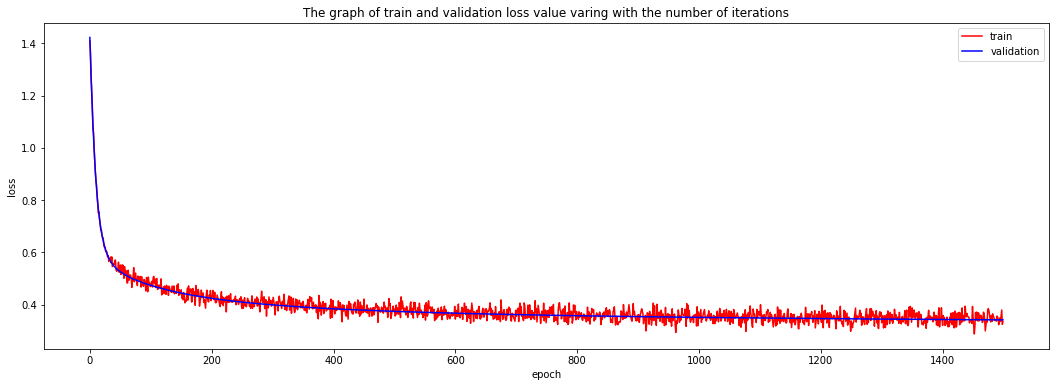

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
plt.plot(losses_train, color="r", label="train")
plt.plot(losses_val, color="b", label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("The graph of train and validation loss value varing with the number of iterations")

<span style="color:#9a9898">References:</span>

<span style="color:#9a9898">1.逻辑回归（Logistic Regression）[EB/OL]. https://blog.csdn.net/liulina603/article/details/78676723.<br>
    2.逻辑回归的理解[EB/OL]. https://blog.csdn.net/t46414704152abc/article/details/79574003.<br>
    3.分类算法之逻辑回归详解[EB/OL]. https://blog.csdn.net/yawei_liu1688/article/details/78733641<br>
    4.逻辑回归原理解析[EB/OL]. https://yq.aliyun.com/articles/111249?t=t1.<br>
    5.逻辑回归：损失函数与梯度下降[EB/OL]. https://blog.csdn.net/jediael_lu/article/details/77852060.<br>
    6.逻辑回归(logistic regression)的本质——极大似然估计[EB/OL]. https://blog.csdn.net/zjuPeco/article/details/77165974.<br>
7.逻辑斯蒂（logistic）回归深入理解、阐述与实现[EB/OL]. https://www.cnblogs.com/happylion/p/4169945.html.<br>
8.机器学习笔记－－classification_report&精确度/召回率/F1值[EB/OL]. https://blog.csdn.net/akadiao/article/details/78788864.<br>
9.Markdown 公式指导手册[EB/OL]. https://www.zybuluo.com/codeep/note/163962#4.</span>